In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from math import ceil
from sklearn.metrics import silhouette_score,silhouette_samples
import random as rd
import copy
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
#memanggil data
data = pd.read_excel('mushrooms.xlsx')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#cek missing data
kosong = data.isna().any()
tipe = data.dtypes
info = pd.concat([kosong,tipe], axis = 1, keys = ['Null', 'type'])
print(info)

                           Null    type
class                     False  object
cap-shape                 False  object
cap-surface               False  object
cap-color                 False  object
bruises                   False  object
odor                      False  object
gill-attachment           False  object
gill-spacing              False  object
gill-size                 False  object
gill-color                False  object
stalk-shape               False  object
stalk-root                False  object
stalk-surface-above-ring  False  object
stalk-surface-below-ring  False  object
stalk-color-above-ring    False  object
stalk-color-below-ring    False  object
veil-type                 False  object
veil-color                False  object
ring-number               False  object
ring-type                 False  object
spore-print-color         False  object
population                False  object
habitat                   False  object


In [ ]:
#cek data duplikat
def cek_duplikat(data):
    df = pd.DataFrame(data)
    return df.duplicated().any()

if cek_duplikat(data):
    print("Data memiliki duplikat.")
else:
    print("Data tidak memiliki duplikat.")

Data tidak memiliki duplikat.


In [ ]:
#menghapus kolom class
data.drop(columns=['class'], inplace=True)
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#pada kolom stalk-root terdapat nilai "?"

#periksa nilai '?'
print(data['stalk-root'].unique())

# Mengganti '?' dengan NaN
data.replace({'stalk-root': {'?': np.nan}}, inplace=True)

# Menghitung modus setelah mengganti '?' dengan NaN
avg_stalk_root = data['stalk-root'].mode()[0]

# Mengisi nilai NaN dengan modus
data['stalk-root'].fillna(avg_stalk_root, inplace=True)

# Cetak nilai unik dalam kolom 'stalk-root' untuk memverifikasi
print(data['stalk-root'].unique())

# Cetak tipe data kolom 'stalk-root'
print(data['stalk-root'].dtype)

['e' 'c' 'b' 'r' '?']
['e' 'c' 'b' 'r']
object


In [ ]:
#instal library encoders
!pip install category_encoders

In [ ]:
#import library encoders
import category_encoders as ce

In [ ]:
# Melakukan encoding >> merubah type data kategorical menjadi numerik
encoder = ce.OrdinalEncoder(cols=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

data_encode = encoder.fit_transform(data)
data_encode

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,1,2,2,2
2,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,1,2,2,3
3,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,1,1,2,4,2,1,2,11,1,...,1,7,8,1,3,1,1,9,6,7
8120,1,1,1,2,4,2,1,2,11,1,...,1,7,8,1,2,1,1,9,4,7
8121,4,1,1,2,4,2,1,2,2,1,...,1,7,8,1,3,1,1,9,6,7
8122,5,2,1,2,7,1,1,1,9,2,...,4,1,1,1,1,1,2,5,4,7


In [ ]:
#melihat info data_encode
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises                   8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

In [ ]:
#mereduksi dimensi dari dataset menggunakan PCA menjadi dimensi 2
from sklearn.decomposition import PCA
pca2d = PCA(n_components=2).fit_transform(data_encode)
pca2d

array([[-7.40968419,  0.1523438 ],
       [-6.09885709,  0.39403097],
       [-4.64051938, -0.32558996],
       ...,
       [ 3.65825778,  8.30348993],
       [ 5.20425779, -2.48159624],
       [ 8.38447236,  4.05351371]])

In [ ]:
#mencari jumlah klaster yg optimal dengan metode Elbow
from sklearn.cluster import KMeans

cluster = []
for i in range(1,10):
  km = KMeans(n_clusters=i, init= 'k-means++').fit(pca2d)
  cluster.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

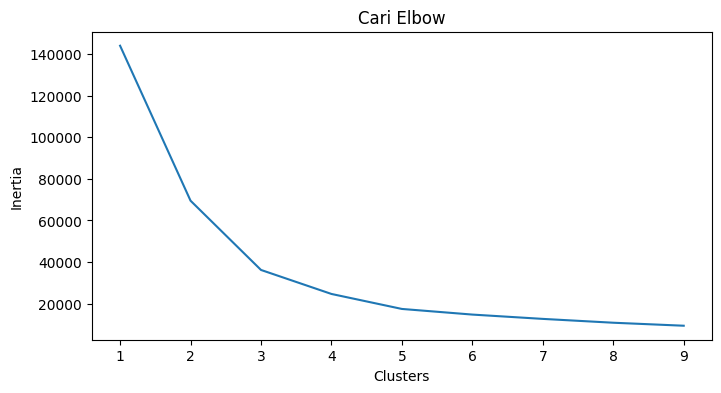

In [ ]:
#membuat visualisasi hasil dari metode Elbow untuk menentukan jumlah klaster yang optimal dalam algoritma klastering KMeans.
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 10)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


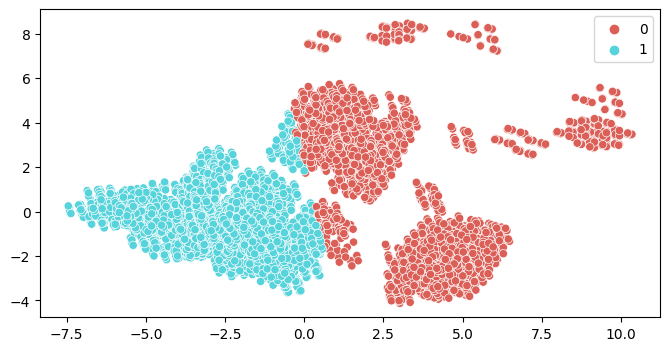

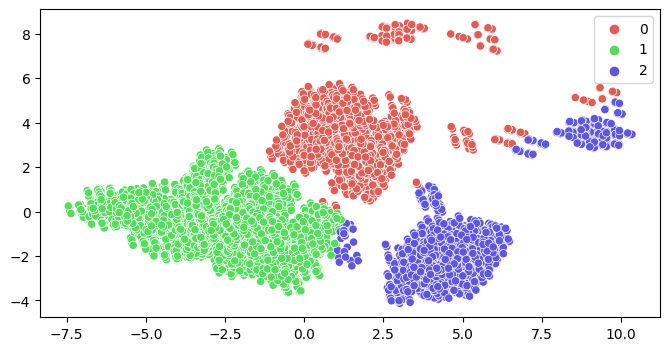

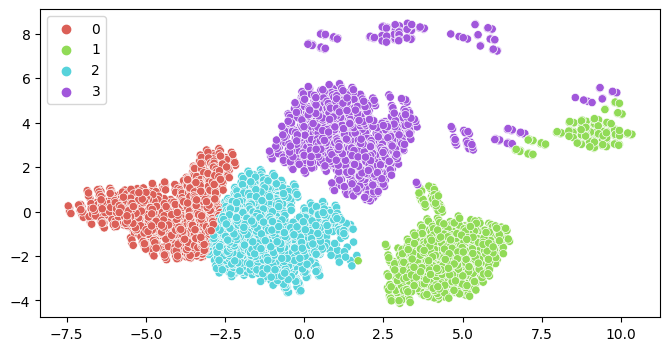

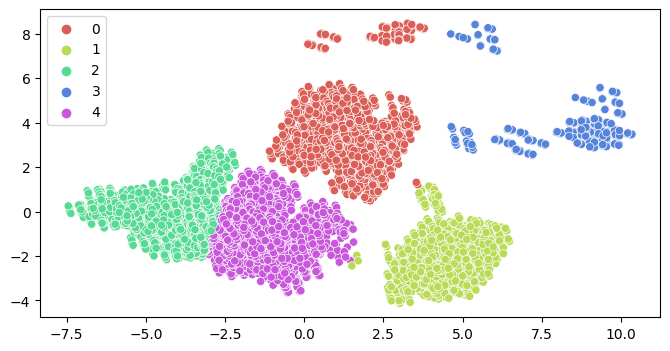

In [ ]:
#melakukan klastering menggunakan algoritma KMeans dengan jumlah klaster yang bervariasi dari 2 hingga 5
for i in range(2,6):
  model = KMeans(n_clusters=i, init= 'k-means++').fit(pca2d)

  plt.figure(figsize=(8, 4))
  sns.scatterplot(data =pca2d, x=pca2d[:,0], y=pca2d[:,1], hue=model.labels_,  palette=sns.color_palette('hls', i))
  plt.legend();

In [ ]:
#membuat model KMeans dengan jumlah klaster (clusters) sebanyak 2 dan melatihnya pada data hasil PCA (pca2d).
model1 = KMeans(n_clusters=2).fit(pca2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


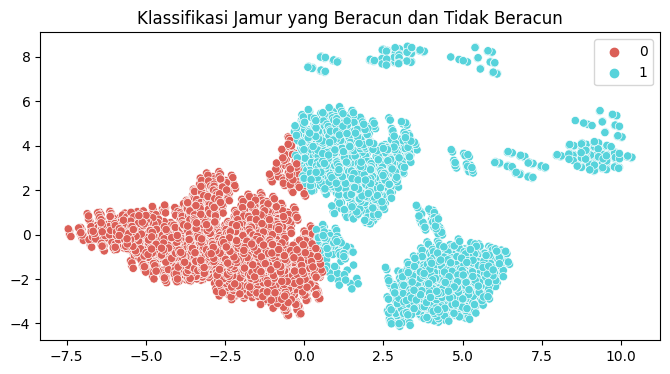

In [ ]:
#memvisualisasikan bagaimana sampel-sampel pada dataset terkelompok dalam dua klaster yang dihasilkan oleh model KMeans (model1)
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data =pca2d, x=pca2d[:,0], y=pca2d[:,1], hue=model1.labels_,  palette=sns.color_palette('hls', 2))
ax.set_title('Klassifikasi Jamur yang Beracun dan Tidak Beracun')
ax.legend()
fig.show();

In [ ]:
# Menghitung Silhouette Score
for i in range(2,6):
  model = KMeans(n_clusters=i, init= 'k-means++').fit(pca2d)
  silhouette_avg = silhouette_score(pca2d, model.labels_)
  print(f"Silhouette score untuk {i} kluster : ", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score untuk 2 kluster :  0.4913159825471034


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score untuk 3 kluster :  0.5862488715466851


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score untuk 4 kluster :  0.5207493246993187


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score untuk 5 kluster :  0.545893097796818


Seperti yang bisa kita lihat, K=2 memiliki nilai Silhouette yang terendah, namun dengan K=2 menghasilkan kelompok yang lebih seragam (uniform). Dalam konteks ini, kelompok yang lebih seragam dianggap lebih baik atau lebih relevan dengan tujuan analisis klastrisasi kelompok kami, yaitu membagi mushrooms dalam kelompok mushrooms yang bisa dimakan dan tidak bisa dimakan.

In [ ]:
#prediksi klaster untuk setiap titik data dalam bentuk array
Ypreds=model1.predict(pca2d)

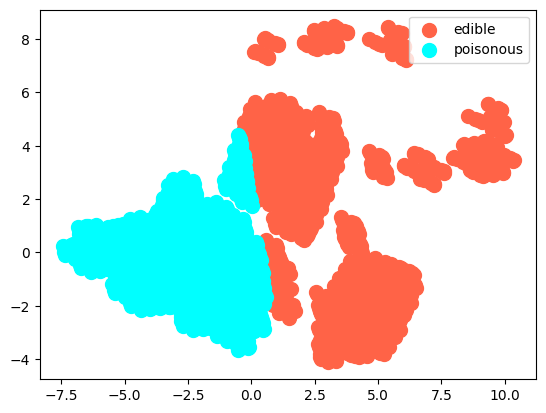

In [ ]:
#membuat visualisasi dari Ypreds
plt.scatter(pca2d[Ypreds == 1, 0], pca2d[Ypreds == 1, 1], s = 100, c = 'tomato', label = 'edible')
plt.scatter(pca2d[Ypreds == 0, 0], pca2d[Ypreds == 0, 1], s = 100, c = 'aqua', label = 'poisonous')
plt.legend()